# K MEANS FROM SCRATCH
<hr style="height:5px;border-width:2;color:gray">

In this notebook we will be implementing K Means from scratch. K Means can be implemented using scikit learn. However to get a better understanding of what is actually happening behind the scenes, we will be implementing K Means from scratch.

#### Dataset
You are given a file "data.npy" along with this assignment notebook. Load the numpy array from that file and cluster on that data.

#### Tasks
<ul>
    <li>
        <b>Creating Functions</b>:<br>
        You are expected to create the following functions.
        <ul>
            <li>Model function that implements K Means given K value and data. It should return the cluster centers.</li>
            <li>Error function that calculates the SSE given cluster centers and data. It should return SSE value.</li>
            <li>Function to plot Elbow plot given maximum number of K values and data.</li>
        </ul>
        Apart from these you can create as many helper funtions as you want but these three functions must be defined.
    </li>
    <li>
        <b>Clustering</b>:<br>
        Here you are expected to perform K Means clustering on the given data using the suitable K Value and then give suitable cluster centers.
    </li>
</ul>

#### Important note
<b>You are not allowed to use any library other than numpy and matplotlib (You can use seaborn instead of matplotlib if you wish to do so).</b>

### Creating Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

In [2]:
def KMeans(K, X, num_iter = 50, max_steps = 100):
    best_cluster_centers = np.zeros((K, X.shape[1])) #Initializing best cluster centers to zeros
    min_SSE = np.inf #Setting minimum SSE to infinity
    
    for i in range(num_iter):
        #Chosing K random data points as cluster centers without replacement
        I = np.random.choice(np.arange(X.shape[0]), K, replace = False)
        cluster_centers = X[I]
        
        for step in range(max_steps):
            assigned_clusters = assign_clusters(X, cluster_centers)
            
            #This condition starts the current iteration again if there are any empty clusters
            if(len(np.unique(assigned_clusters)) != K):
                break
            
            prev_cluster_centers = cluster_centers #Storing value of previous cluster centers for later use
            for k in range(K):
                #Changing cluster centers to mean of data points belonging to one cluster
                cluster_centers[k] = np.average(X[assigned_clusters == k], axis = 0)
            
            if(np.sum(cluster_centers == prev_cluster_centers) == np.size(cluster_centers)):
                break #Stop taking steps if cluster centers stop changing
        
        SSE = calculate_SSE(X, cluster_centers)
        
        if(SSE < min_SSE):
            best_cluster_centers = cluster_centers #Upddate best cluster centers if current SSE is lesser than min_SSE
            min_SSE = SSE
    
    return best_cluster_centers

In [3]:
def assign_clusters(X, cluster_centers):
    K = cluster_centers.shape[0]
    
    #Initialize array to store distances of all data points from each cluster center
    distances = np.zeros((X.shape[0], K))
    
    for k in range(K):
        #Calculating distances of data points from each cluster center
        distances[:, k] = np.sqrt(np.sum((X - cluster_centers[k])**2, axis = 1))
    
    assigned_clusters = np.argmin(distances, axis = 1) #Assigning closest cluster center to each data point
    
    return assigned_clusters

In [4]:
def calculate_SSE(X, cluster_centers):
    assigned_clusters = assign_clusters(X, cluster_centers)
    SSE = 0
    
    for k in range(cluster_centers.shape[0]):
        SSE += np.sum((X[assigned_clusters == k] - cluster_centers[k])**2)
    
    return SSE

In [5]:
def plot_elbow(X, K_max = 10):
    SSE_list = []
    
    for i in range(K_max):
        cluster_centers = KMeans(i+1, X)
        SSE = calculate_SSE(X, cluster_centers)
        SSE_list.append(SSE)
    
    plt.plot(np.arange(1, K_max+1), SSE_list)
    plt.title("Elbow plot (SSE vs K)")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.xlabel("Number of Clusters (K)")

### Clustering

In [6]:
data = np.load("data.npy")

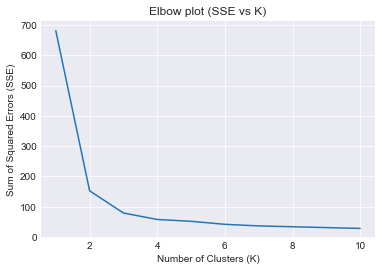

In [7]:
plot_elbow(data)

From the elbow plot, we can see that the curve starts to flatten out from K = 3.

In [8]:
KMeans(3, data)

array([[5.9296875 , 2.7578125 , 4.4109375 , 1.4390625 ],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85277778, 3.075     , 5.78611111, 2.09722222]])